# Academic Performance Prediction using Sleep and Study Patterns

This notebook analyzes how sleep duration, concentration difficulty, and academic stress relate to students’ academic performance using a regression model.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import os
os.listdir()


['.ipynb_checkpoints',
 'sleep_study_regression.ipynb',
 'Student Insomnia and Educational Outcomes Dataset.csv',
 'Student Insomnia and Educational Outcomes Dataset_version-2.csv']

In [3]:
df1 = pd.read_csv("Student Insomnia and Educational Outcomes Dataset.csv")
df2 = pd.read_csv("Student Insomnia and Educational Outcomes Dataset_version-2.csv")

df1.shape, df2.shape


((791, 16), (996, 16))

## Dataset

The dataset is survey-based and captures students’ sleep habits, stress levels, concentration difficulties, and self-reported academic performance.


In [4]:
df = pd.read_csv("Student Insomnia and Educational Outcomes Dataset_version-2.csv")
df.head()


,Timestamp,1. What is your year of study?,2. What is your gender?,3. How often do you have difficulty falling asleep at night?,"4. On average, how many hours of sleep do you get on a typical day?",5. How often do you wake up during the night and have trouble falling back asleep?,6. How would you rate the overall quality of your sleep?,7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?,"8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?","9. How often do you miss or skip classes due to sleep-related issues (e.g., insomnia, feeling tired)?",10. How would you describe the impact of insufficient sleep on your ability to complete assignments and meet deadlines?,"11. How often do you use electronic devices (e.g., phone, computer) before going to sleep?","12. How often do you consume caffeine (coffee, energy drinks) to stay awake or alert?",13. How often do you engage in physical activity or exercise?,14. How would you describe your stress levels related to academic workload?,15. How would you rate your overall academic performance (GPA or grades) in the past semester?
0,10/24/2024 16:51:15,Graduate student,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Good,Sometimes,Often,Often (3-4 times a week),Moderate impact,Often (5-6 times a week),Rarely (1-2 times a week),Sometimes (3-4 times a week),High stress,Average
1,10/24/2024 16:51:51,Third year,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Good,Often,Sometimes,Sometimes (1-2 times a week),Major impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Sometimes (3-4 times a week),Low stress,Good
2,10/24/2024 16:52:21,First year,Female,Sometimes (3-4 times a week),7-8 hours,Sometimes (3-4 times a week),Good,Often,Often,Sometimes (1-2 times a week),Major impact,Often (5-6 times a week),Often (5-6 times a week),Often (5-6 times a week),High stress,Below Average
3,10/24/2024 16:53:00,Third year,Male,Often (5-6 times a week),More than 8 hours,Sometimes (3-4 times a week),Poor,Often,Often,Rarely (1-2 times a month),Minor impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Every day,Extremely high stress,Excellent
4,10/24/2024 16:53:25,Graduate student,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Very good,Always,Sometimes,Sometimes (1-2 times a week),Moderate impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Often (5-6 times a week),Low stress,Average


## Exploratory Data Analysis (EDA)

EDA is performed to understand the structure of the dataset, response distributions, and relationships between sleep, stress, and academic performance.


In [5]:
df.shape


(996, 16)

In [6]:
df.columns


Index(['Timestamp', '1. What is your year of study?',
       '2. What is your gender?',
       '3. How often do you have difficulty falling asleep at night? ',
       '4. On average, how many hours of sleep do you get on a typical day?',
       '5. How often do you wake up during the night and have trouble falling back asleep?',
       '6. How would you rate the overall quality of your sleep?',
       '7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?',
       '8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?',
       '9. How often do you miss or skip classes due to sleep-related issues (e.g., insomnia, feeling tired)?',
       '10. How would you describe the impact of insufficient sleep on your ability to complete assignments and meet deadlines?',
       '11. How often do you use electronic devices (e.g., phone, computer) before going to sleep?',
       '12. How often do you con

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 16 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                   --------------  ----- 
 0   Timestamp                                                                                                                996 non-null    object
 1   1. What is your year of study?                                                                                           996 non-null    object
 2   2. What is your gender?                                                                                                  996 non-null    object
 3   3. How often do you have difficulty falling asleep at night?                                                             996 non-null    object
 

In [8]:
df.describe()


,Timestamp,1. What is your year of study?,2. What is your gender?,3. How often do you have difficulty falling asleep at night?,"4. On average, how many hours of sleep do you get on a typical day?",5. How often do you wake up during the night and have trouble falling back asleep?,6. How would you rate the overall quality of your sleep?,7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?,"8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?","9. How often do you miss or skip classes due to sleep-related issues (e.g., insomnia, feeling tired)?",10. How would you describe the impact of insufficient sleep on your ability to complete assignments and meet deadlines?,"11. How often do you use electronic devices (e.g., phone, computer) before going to sleep?","12. How often do you consume caffeine (coffee, energy drinks) to stay awake or alert?",13. How often do you engage in physical activity or exercise?,14. How would you describe your stress levels related to academic workload?,15. How would you rate your overall academic performance (GPA or grades) in the past semester?
count,996,996,996,996,996,996,996,996,996,996,996,996,996,996,996,996
unique,993,4,2,5,5,5,5,5,5,5,5,5,5,5,4,5
top,12/15/2024 6:06:05,Graduate student,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Very poor,Often,Often,Often (3-4 times a week),Major impact,Often (5-6 times a week),Often (5-6 times a week),Often (5-6 times a week),Extremely high stress,Poor
freq,2,481,691,446,508,491,290,501,470,518,475,508,500,453,490,491


## Feature and Target Selection

Relevant features related to sleep duration, concentration difficulty, and stress level are selected.  
Academic performance is chosen as the target variable.



In [9]:
df_model = df[
    [
        '4. On average, how many hours of sleep do you get on a typical day?',
        '7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?',
        '14. How would you describe your stress levels related to academic workload?',
        '15. How would you rate your overall academic performance (GPA or grades) in the past semester?'
    ]
]


In [10]:
df_model.columns = [
    'SleepHours',
    'ConcentrationDifficulty',
    'StressLevel',
    'AcademicPerformance'
]


In [11]:
df_model.head()


,SleepHours,ConcentrationDifficulty,StressLevel,AcademicPerformance
0,7-8 hours,Sometimes,High stress,Average
1,7-8 hours,Often,Low stress,Good
2,7-8 hours,Often,High stress,Below Average
3,More than 8 hours,Often,Extremely high stress,Excellent
4,7-8 hours,Always,Low stress,Average


In [12]:
columns_to_check = [
    '4. On average, how many hours of sleep do you get on a typical day?',
    '7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?',
    '14. How would you describe your stress levels related to academic workload?',
    '15. How would you rate your overall academic performance (GPA or grades) in the past semester?'
]

for col in columns_to_check:
    print(f"--- UNIQUE VALUES IN: {col} ---")
    print(df[col].unique())
    print()


--- UNIQUE VALUES IN: 4. On average, how many hours of sleep do you get on a typical day? ---
['7-8 hours' 'More than 8 hours' '6-7 hours' '4-5 hours'
 'Less than 4 hours']

--- UNIQUE VALUES IN: 7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep? ---
['Sometimes' 'Often' 'Always' 'Rarely' 'Never']

--- UNIQUE VALUES IN: 14. How would you describe your stress levels related to academic workload? ---
['High stress' 'Low stress' 'Extremely high stress' 'No stress']

--- UNIQUE VALUES IN: 15. How would you rate your overall academic performance (GPA or grades) in the past semester? ---
['Average' 'Good' 'Below Average' 'Excellent' 'Poor']



## Data Preprocessing

Ordinal survey responses are encoded into numerical values to make them suitable for regression modeling.  
Rows with missing values are removed.


In [13]:
sleep_mapping = {
    'Less than 4 hours': 3,
    '4-5 hours': 4.5,
    '6-7 hours': 6.5,
    '7-8 hours': 7.5,
    'More than 8 hours': 9
}


In [14]:
concentration_mapping = {
    'Never': 1,
    'Rarely': 2,
    'Sometimes': 3,
    'Often': 4,
    'Always': 5
}


In [15]:
stress_mapping = {
    'No stress': 1,
    'Low stress': 2,
    'High stress': 4,
    'Extremely high stress': 5
}


In [16]:
performance_mapping = {
    'Poor': 1,
    'Below Average': 2,
    'Average': 3,
    'Good': 4,
    'Excellent': 5
}


In [17]:
df_model = df[
    [
        '4. On average, how many hours of sleep do you get on a typical day?',
        '7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?',
        '14. How would you describe your stress levels related to academic workload?',
        '15. How would you rate your overall academic performance (GPA or grades) in the past semester?'
    ]
].copy()


In [18]:
df_model.columns = [
    'SleepHours',
    'ConcentrationDifficulty',
    'StressLevel',
    'AcademicPerformance'
]


In [19]:
df_model['SleepHours'] = df_model['SleepHours'].map(sleep_mapping)
df_model['ConcentrationDifficulty'] = df_model['ConcentrationDifficulty'].map(concentration_mapping)
df_model['StressLevel'] = df_model['StressLevel'].map(stress_mapping)
df_model['AcademicPerformance'] = df_model['AcademicPerformance'].map(performance_mapping)


In [20]:
df_model = df_model.dropna()
df_model.head()


,SleepHours,ConcentrationDifficulty,StressLevel,AcademicPerformance
0,7.5,3,4,3
1,7.5,4,2,4
2,7.5,4,4,2
3,9.0,4,5,5
4,7.5,5,2,3


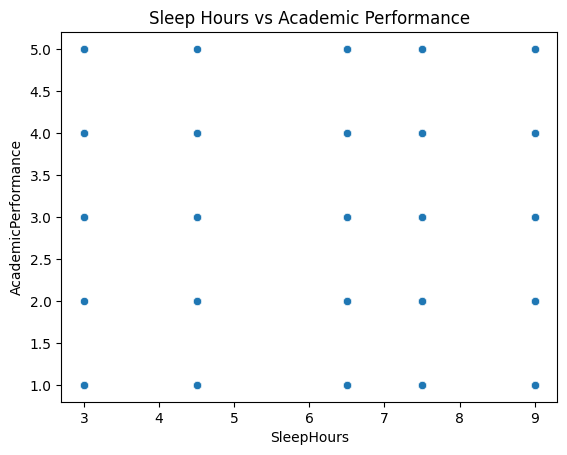

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='SleepHours', y='AcademicPerformance', data=df_model)
plt.title("Sleep Hours vs Academic Performance")
plt.show()


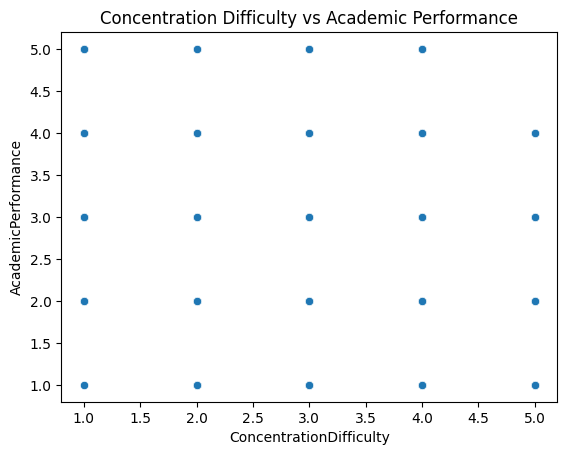

In [22]:
sns.scatterplot(x='ConcentrationDifficulty', y='AcademicPerformance', data=df_model)
plt.title("Concentration Difficulty vs Academic Performance")
plt.show()


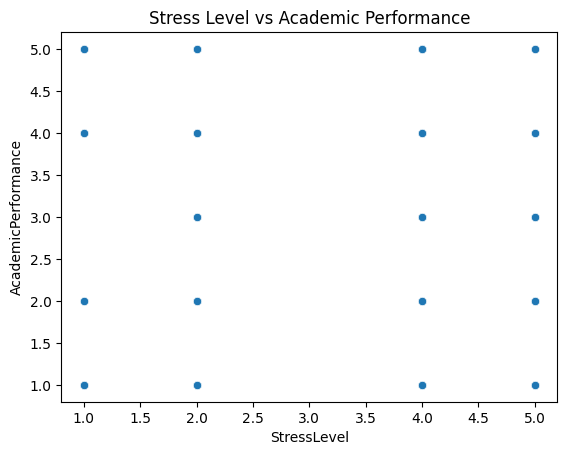

In [23]:
sns.scatterplot(x='StressLevel', y='AcademicPerformance', data=df_model)
plt.title("Stress Level vs Academic Performance")
plt.show()


## Train-Test Split and Model Training

The dataset is split into training and testing sets to evaluate model performance on unseen data.
A Linear Regression model is trained to predict academic performance based on sleep, concentration difficulty, and stress level.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

X = df_model[['SleepHours', 'ConcentrationDifficulty', 'StressLevel']]
y = df_model['AcademicPerformance']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)




## Model Evaluation

The model is evaluated using R² and Mean Absolute Error (MAE) to assess predictive performance.


In [25]:
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R² Score: 0.11421483489278084
MAE: 0.6199557394513314


## Interpretation of Results

Due to the subjective and survey-based nature of the data, modest R² values are expected.  
However, the MAE indicates that the model predicts academic performance within a reasonable range.


## Conclusion

This notebook demonstrates a complete regression workflow, including data exploration, preprocessing, model training, and evaluation.  
The results highlight meaningful trends between sleep habits, stress, and academic performance, while also acknowledging the limitations of survey-based data.
